<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_AAPL_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-13 14:22:15--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.97.138, 108.177.97.101, 108.177.97.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6btjft3mtgl5mh3cchnapula9rt9mmdr/1673619675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=91607c88-8377-4536-8dcd-1696e0cf1767 [following]
--2023-01-13 14:22:16--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6btjft3mtgl5mh3cchnapula9rt9mmdr/1673619675000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=91607c88-8377-4536-8dcd-1696e0cf1767
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to doc-0k

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/aapl_2008_Q1_20080122發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#將資料print出來 (這邊可跑可不跑)
doc = nlp(text)
for token in doc[123:130]:
   print(token.text)

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

Today
’s
call
is
being
recorded
.


In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity", "Alpha", "Stopword", "Punct", "Num", "Pos", "Dep")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, token.is_alpha, token.is_stop, token.is_punct, token.like_num, spacy.explain(token.pos_),   spacy.explain(token.dep_)]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Alpha,Stopword,Punct,Num,Pos,Dep
0,Apple,0.0,0.0,True,False,False,False,proper noun,compound
1,Inc.,0.0,0.0,False,False,False,False,proper noun,root
2,(,0.0,0.0,False,False,True,False,punctuation,punctuation
3,NASDAQ,0.0,0.0,True,False,False,False,proper noun,appositional modifier
4,:,0.0,0.0,False,False,True,False,punctuation,punctuation
...,...,...,...,...,...,...,...,...,...
9737,have,0.0,0.0,True,True,False,False,verb,conjunct
9738,a,0.0,0.0,True,True,False,False,determiner,determiner
9739,wonderful,1.0,1.0,True,False,False,False,adjective,adjectival modifier
9740,day,0.0,0.0,True,False,False,False,noun,direct object


In [ ]:
df.loc[df['Dep'] == 'auxiliary (passive)']

,Word,Polarity,Subjectivity,Alpha,Stopword,Punct,Num,Pos,Dep
127,being,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
191,be,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
408,was,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
1388,were,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
3514,was,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
3730,were,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
3967,are,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
4585,’s,0.0,0.0,False,True,False,False,auxiliary,auxiliary (passive)
4747,was,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)
4847,were,0.0,0.0,True,True,False,False,auxiliary,auxiliary (passive)


In [ ]:
jj = pd.DataFrame(df.loc[df['Alpha'] == 'false'])
jj

,Word,Polarity,Subjectivity,Alpha,Stopword,Punct,Num,Pos,Dep


In [ ]:
df.describe()

,Polarity,Subjectivity
count,9742.000000,9742.000000
mean,0.013032,0.031315
std,0.090433,0.140030
min,-0.800000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
1,Inc.,0.0,0.0,proper noun,root,False,False,False,False
2,(,0.0,0.0,punctuation,punctuation,False,False,True,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
4,:,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9737,have,0.0,0.0,verb,conjunct,True,True,False,False
9738,a,0.0,0.0,determiner,determiner,True,True,False,False
9739,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False
9740,day,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
df.shape

(9742, 9)

In [ ]:
aa = 'Polarity='
print('2008_AAPL_Q1詞總數:',df['Polarity'].count())
print(aa,df['Polarity'].value_counts())

2008_AAPL_Q1詞總數: 9742
Polarity=  0.000000    9262
 0.200000     106
 0.500000      71
 0.250000      35
-0.125000      27
 0.800000      24
 0.136364      18
 0.400000      16
 0.600000      13
 0.100000      13
 0.700000      12
 0.433333      12
 1.000000      11
 0.375000      10
-0.155556       9
-0.166667       9
-0.187500       8
-0.400000       8
-0.025000       6
 0.300000       6
 0.333333       6
-0.100000       5
 0.285714       4
-0.250000       4
 0.160000       4
-0.500000       4
 0.750000       4
-0.300000       3
 0.900000       3
-0.071429       3
 0.214286       3
-0.200000       2
 0.100000       2
 0.166667       2
 0.062500       2
-0.150000       2
-0.800000       2
-0.291667       2
 0.357143       1
 0.350000       1
 0.433333       1
 0.666667       1
-0.312500       1
 0.600000       1
 0.150000       1
-0.066667       1
-0.133333       1
Name: Polarity, dtype: int64


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          9742 non-null   object 
 1   Polarity      9742 non-null   float64
 2   Subjectivity  9742 non-null   float64
 3   Pos_          9742 non-null   object 
 4   Dep_          9739 non-null   object 
 5   Alpha         9742 non-null   bool   
 6   Stopword      9742 non-null   bool   
 7   Punct         9742 non-null   bool   
 8   Num           9742 non-null   bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 418.7+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Apple,0.0,0.0,proper noun,compound,True,False,False,False
3,NASDAQ,0.0,0.0,proper noun,appositional modifier,True,False,False,False
5,AAPL,0.0,0.0,proper noun,appositional modifier,True,False,False,False
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
10,January,0.0,0.0,proper noun,appositional modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9727,presentation,0.0,0.0,noun,direct object,True,False,False,False
9731,thank,0.0,0.0,verb,root,True,False,False,False
9735,participation,0.0,0.0,noun,object of preposition,True,False,False,False
9739,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
df.describe()

,Polarity,Subjectivity
count,3728.000000,3728.000000
mean,0.026384,0.062976
std,0.133039,0.203218
min,-0.800000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
8,Earnings,0.0,0.0,noun,compound,True,False,False,False
15,PM,0.0,0.0,noun,appositional modifier,True,False,False,False
108,day,0.0,0.0,noun,appositional modifier,True,False,False,False
110,welcome,0.8,0.9,noun,conjunct,True,False,False,False
116,quarter,0.0,0.0,noun,modifier of nominal,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9727,presentation,0.0,0.0,noun,direct object,True,False,False,False
9731,thank,0.0,0.0,verb,root,True,False,False,False
9735,participation,0.0,0.0,noun,object of preposition,True,False,False,False
9739,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
118,quarterly,0.0,0.0,adjective,adjectival modifier,True,False,False,False
128,recorded,0.0,0.0,verb,root,True,False,False,False
142,like,0.0,0.0,verb,root,True,False,False,False
146,conference,0.0,0.0,noun,direct object,True,False,False,False
164,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9724,conclude,0.0,0.0,verb,root,True,False,False,False
9727,presentation,0.0,0.0,noun,direct object,True,False,False,False
9731,thank,0.0,0.0,verb,root,True,False,False,False
9739,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
118,quarterly,0.0,0.0,adjective,adjectival modifier,True,False,False,False
164,ahead,0.0,0.0,adverb,adverbial modifier,True,False,False,False
173,Good,0.7,0.6,adjective,adjectival modifier,True,False,False,False
226,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
228,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9657,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False
9669,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False
9682,financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False
9691,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False


In [ ]:
fr = pd.DataFrame(df.loc[df['Pos_'].values == 'noun'])
fr

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
858,mainstream,0.0,0.0,noun,adjectival modifier,True,False,False,False
1171,record,0.0,0.0,noun,adjectival modifier,True,False,False,False
2834,view,0.0,0.0,noun,unclassified dependent,True,False,False,False
2876,mainstream,0.0,0.0,noun,adjectival modifier,True,False,False,False
3584,change,0.0,0.0,noun,unclassified dependent,True,False,False,False
3956,buy,0.0,0.0,noun,adjectival modifier,True,False,False,False
4355,know,0.0,0.0,noun,parataxis,True,False,False,False
7622,report,0.0,0.0,noun,relative clause modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    615.000000
mean       0.127849
std        0.267915
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.214286
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    615.000000
mean       0.327481
std        0.361776
min        0.000000
25%        0.000000
50%        0.142857
75%        0.600000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
df.tail()

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
9657,approximately,-0.4,0.6,adverb,adverbial modifier,True,False,False,False,Negative,Subjective
9669,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
9682,financial,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
9691,additional,0.0,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
9739,wonderful,1.0,1.0,adjective,adjectival modifier,True,False,False,False,Positive,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,49
1,Neutral,Objective,278
2,Neutral,Subjective,85
3,Positive,Subjective,203


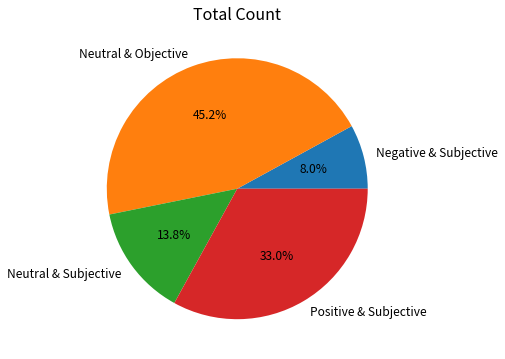

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

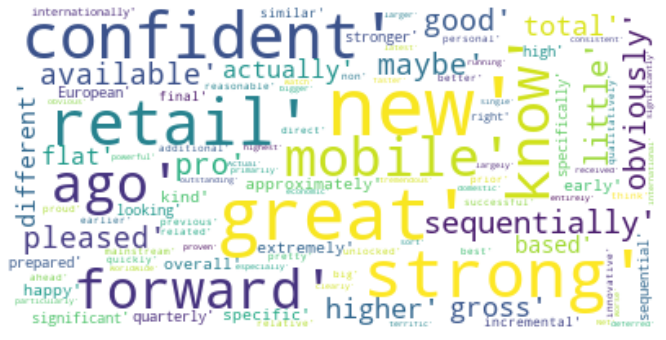

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
for sentence in doc.sents:
#   sentence_list.append(sentence)
  print(sentence.text)
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

Apple Inc. (NASDAQ:AAPL) F1Q08 Earnings Call January 22, 2008 5:00 PM ETExecutivesNancy Paxton - Investor RelationsPeter Oppenheimer - Chief Financial Officer, Senior Vice PresidentTimothy D. Cook - Chief Operating OfficerAnalystsKaty Huberty - Morgan StanleyBill Fearnley - FTN MidwestDavid Bailey - Goldman SachsBill Shope - J.P. MorganRichard Gardner - CitigroupBen Reitzes - UBSShannon Cross - Cross ResearchKeith Bachman - Bank of MontrealCharles Wolf - Needham & CompanyGene Munster - Piper JaffrayAndrew Neff - Bear StearnsToni Sacconaghi - Sanford BernsteinMike Abramsky - RBC Capital MarketsTavis McCourt - Morgan KeeganShaw Wu - American Technology ResearchChris Whitmore -
Deutsche Bank Andy Hargreaves - Pacific Crest SecuritiesOperatorGood day and welcome to the Apple Incorporated first quarter 2008 quarterly results conference call.
Today’s call is being recorded.
At this time, for opening remarks and introductions, I would like to turn the conference over to Ms. Nancy Paxton, Seni

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Apple Inc. (NASDAQ:AAPL) F1Q08 Earnings Call J...,0.000,0.000000
1,Deutsche Bank Andy Hargreaves - Pacific Crest ...,0.525,0.616667
2,Today’s call is being recorded.,0.000,0.000000
3,"At this time, for opening remarks and introduc...",0.000,0.000000
4,"Please go ahead, Madam.",0.000,0.000000
...,...,...,...
414,Members of the press with additional questions...,0.000,0.000000
415,Joan is at 408-974-4570 and I am at 408-974-5420.,0.000,0.000000
416,Thanks again for joining us.,0.200,0.200000
417,"OperatorLadies and gentlemen, that does conclu...",0.000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    419.000000
mean       0.142961
std        0.233738
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.250000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    419.000000
mean       0.317143
std        0.305950
min        0.000000
25%        0.000000
50%        0.281250
75%        0.502500
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
kl = pd.DataFrame(_df.loc[2]).T
kl

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
2,Today’s call is being recorded.,0.0,0.0,Neutral,Objective


In [ ]:
_df.tail()

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
414,Members of the press with additional questions...,0.0,0.0,Neutral,Objective
415,Joan is at 408-974-4570 and I am at 408-974-5420.,0.0,0.0,Neutral,Objective
416,Thanks again for joining us.,0.2,0.2,Positive,Subjective
417,"OperatorLadies and gentlemen, that does conclu...",0.0,0.0,Neutral,Objective
418,We do thank everyone for your participation an...,1.0,1.0,Positive,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,35
1,Neutral,Objective,141
2,Neutral,Subjective,40
3,Positive,Objective,1
4,Positive,Subjective,202


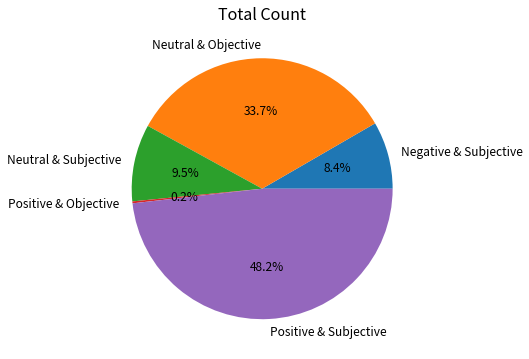

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)Please note that some of the information you’ll hear during our discussion today may consist of forward-looking statements regarding revenue, gross margin, operating expenses, other income and expense, stock-based compensation expense, taxes and earnings.

2)Revenue grew 35% year over year to $9.6 billion, an increase of almost $2.5 billion over the previous December quarter’s record-breaking results.

3)Cash generation for the quarter was over $3 billion, or approximately two times net income.

4)We began and ended the quarter with less than three weeks of Mac channel inventory.

5)With an average of 201 stores open during the quarter, average revenue per store was $8.5 million compared to $6.6 million in the year-ago quarter.

6)For the quarter, we are targeting revenue of about $6.8 billion or approximately 29% growth over the prior March quarter.

7)We expect the total quarterly cost of non-cash stock-based compensation expense to be approximately $135 million.

8)We expect gross

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)Apple Inc. (NASDAQ:AAPL) F1Q08 Earnings Call January 22, 2008 5:00 PM ETExecutivesNancy Paxton - Investor RelationsPeter Oppenheimer - Chief Financial Officer, Senior Vice PresidentTimothy D. Cook - Chief Operating OfficerAnalystsKaty Huberty - Morgan StanleyBill Fearnley - FTN MidwestDavid Bailey - Goldman SachsBill Shope - J.P. MorganRichard Gardner - CitigroupBen Reitzes - UBSShannon Cross - Cross ResearchKeith Bachman - Bank of MontrealCharles Wolf - Needham & CompanyGene Munster - Piper JaffrayAndrew Neff - Bear StearnsToni Sacconaghi - Sanford BernsteinMike Abramsky - RBC Capital MarketsTavis McCourt - Morgan KeeganShaw Wu - American Technology ResearchChris Whitmore -

2)Today’s call is being recorded.

3)At this time, for opening remarks and introductions, I would like to turn the conference over to Ms. Nancy Paxton, Senior Director of Investor Relations and Corporate Finance.

4)Please go ahead, Madam.

5)Nancy Paxton Thank you.

6)Speaking today is Apple CFO Peter Oppenheim

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)Actual results or trends could differ materially from our forecast.

2)Apple assumes no obligation to update any forward-looking statements or information which speak as of their respective dates.

3)Now I’d like to discuss our music products and services, which accounted for 50% of total revenue during the quarter.

4)Total revenue recognized during the quarter from sales of iPhone, iPhone accessories, and payments from carriers was $241 million.

5)Total deferred revenue from iPhone and Apple TV was $1.44 billion at the end of the December quarter compared to $636 million at the end of the September quarter.

6)We capitalized only $1 million of software development expense related to Leopard during the quarter compared to $22 million in the September quarter.

7)We expect OpEx to be about $1.12 billion, including about $115 million related to stock-based compensation.

8)With that, I would like to open the call to questions.

9)Macs just had a terrific quarter.

10)Bill Fearnley - 

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Deutsche Bank Andy Hargreaves - Pacific Crest SecuritiesOperatorGood day and welcome to the Apple Incorporated first quarter 2008 quarterly results conference call.

2)Good afternoon and thanks for joining us.

3)For more information, please refer to the risk factors discussed in Apple's Form 10-K for 2007 and the Form 8-K filed with the SEC today in the attached press release.

4)We are very pleased to report our best quarter ever, with the highest revenue and earnings in Apple's history.

5)The revenue growth was driven by record Mac, iPod, and iPhone sales and strong demand for our recent software releases.

6)Our domestic business performed very well, with revenue growing 27% year over year and we were especially pleased with our international business, which grew 46% year over year.

7)Operating margin for the quarter was better than expected at 22.1%, resulting primarily from higher-than-anticipated gross margin and revenue.

8)I’d like to first talk about our Mac products and 

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

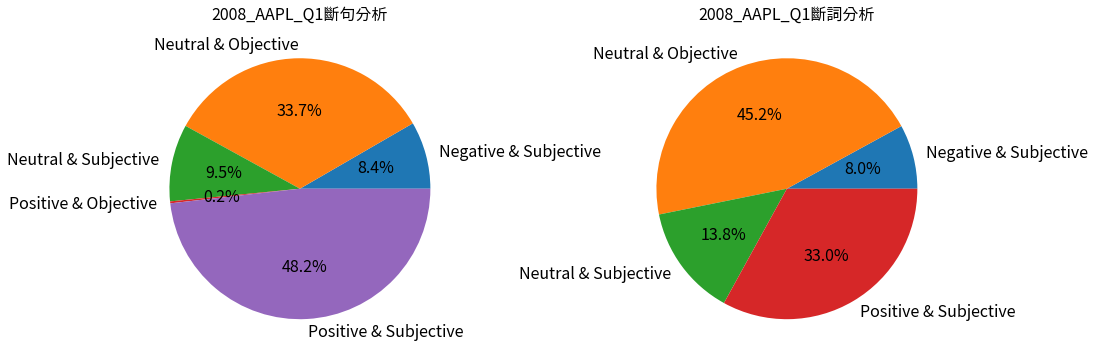

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
label2 = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective", "Positive & Subjective"]

axs[0].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_AAPL_Q1斷句分析', fontsize=16)


axs[1].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_AAPL_Q1斷詞分析', fontsize=16)


plt.savefig("2008_AAPL_Q1(改後).png")
from google.colab import files
files.download("2008_AAPL_Q1(改後).png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 1058246 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
